# Softmax Function

## Goal: understand it better, also learn a bit about $e$

https://en.wikipedia.org/wiki/Softmax_function

The standard (unit) softmax function $\sigma : \mathbb{R}^K\to\mathbb{R}^K$ is defined by the formula:

$\sigma(\mathbf{z})_j = \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}}$ for $\textit{j}$ = 1, …, $\textit{K}$  and  $\mathbf{z}=(z_1,\ldots,z_K) \in\mathbb{R}^K$

In words: we apply the standard exponential function to each element $z_{j}$ of the input vector $\mathbf{z}$ and normalize these values by dividing by the sum of all these exponentials; this normalization ensures that the sum of the components of the output vector $\sigma(\mathbf{z})$ is 1. 

In [74]:
z = [-1, 3, 2]

In [76]:
def softmax(z, e=2.7182818284590452354, temperature=1.0):
    exponentials = [e**(k*temperature) for k in z]
    denominator = sum(exponentials)
    return [j / denominator for j in exponentials]

In [69]:
softmax(z)

[0.013212886953789417, 0.7213991842739687, 0.26538792877224193]

In [77]:
softmax(z, temperature=0.5)

[0.0776955791485706, 0.5740969929676946, 0.3482074278837349]

In [78]:
softmax(z, temperature=2.0)

[0.00029538722303456465, 0.8805369017749616, 0.11916771100200385]

In [70]:
sum(softmax(z))

1.0

### What happens if we don't use $e$?

In [66]:
softmax(z, e=0.001)

[0.000999000999000999, 0.999000999000999, 9.99000999000999e-19]

In [67]:
softmax(z, e=0.1)

[0.09090900826453795, 0.9090900826453793, 9.090900826453796e-07]

In [71]:
softmax(z, e=0.99)

[0.3377133562382438, 0.3411246022608523, 0.3211620415009039]

It seems that $e < 1$ makes the function have the lowest probability for the highest value in the $\mathbf{z}$ vector

In [68]:
softmax(z, e=1)

[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]

The result of $e = 1$ just computes $\frac{1}{|z|}$

In [69]:
softmax(z, e=3.14)

[0.003261969619938955, 0.0010388438280060366, 0.995699186552055]

In [70]:
softmax(z, e=1024)

[8.881784197001244e-16, 8.673617379884028e-19, 0.9999999999999991]

Using increasingly large values for $e$ simply results in the probability distribution getting squashed toward the highest values

#### But *why*?

https://datascience.stackexchange.com/questions/23159/in-softmax-classifier-why-use-exp-function-to-do-normalization

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

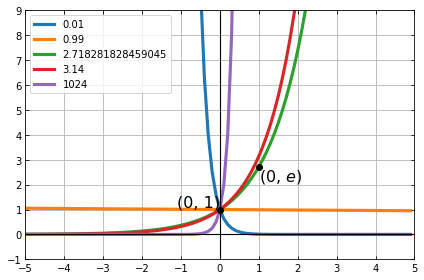

In [265]:
t = np.arange(-5.0, 5.0, 0.1)

fig, ax = plt.subplots()

items = [0.01, 0.99, np.e, 3.14, 1024]
for item in items:   
    line, = ax.plot(t, item**t)
    line.set_linewidth(3.14)
ax.legend(items)
    
ax.axhline(linewidth=1.125, color='black')
ax.axvline(linewidth=1.125, color='black')

ax.plot(0, 1, 'o', color='black')
ax.text(0, 1, '(0, 1)', fontsize=16, horizontalalignment='right', verticalalignment='bottom')

ax.plot(1, np.exp(1), 'o', color='black')
ax.text(1, np.exp(1), '(0, $e$)', fontsize=16, horizontalalignment='left', verticalalignment='top')

ax.set_xlim(-5, 5)
ax.set_ylim(-1, 9)

ax.set_xticks(np.arange(-5, 6, 1))
ax.set_yticks(np.arange(-1, 10, 1))

ax.grid(True)
ax.tick_params(direction='in', top=True, right=True)

fig.tight_layout()
fig.show()

Additional information: https://www.quora.com/Why-is-exponential-function-used-in-softmax-function-in-machine-learning

The goal of softmax function is to take a vector of arbitrary real numbers, such as [-1, 3, 2], and generate a probability distribution with the same number of elements (three in the example) such that larger elements get higher probabilities and smaller elements get smaller probabilities. So, formally, the softmax function need to satisfy the following properties:

- Monotonically increasing — To ensure that larger inputs are mapped to larger outputs.
- Non-negative outputs — Because probability values must be non-negative.
- The outputs should sum to one — This can be achieved by simply dividing each element of the output by the sum of all elements of the output.

**It turns out that the exponential function is both monotonically increasing, and gives non-negative result for any real input. Therefore, it is a natural candidate.**

Further, it results in the Boltzmann distribution that has a tunable temperature parameter \[see [What is the temperature parameter in deep learning?](https://www.quora.com/What-is-the-temperature-parameter-in-deep-learning/answer/Prasoon-Goyal)\] and maximizes the entropy.

_Emphasis mine_

It turns out, we just need some sort of value that fits the above properties. 

# _WELL, THAT'S IT THEN_